### ***STEP 0 Data exploration***

This notebook covers the basic appraoch to get to know the data, its structure as well as the content of the provided dataset. The goal is to provide 1 - 2 meaningfull plots.

    

In [4]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 50)

Load the different data-sets, the two csv files. Then, the structure, content, context and missing values shall be looked at, with the goal to find a suitable visualization method, which offers insight for the reader.

In [5]:
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"

df_gex = pd.read_csv(DATA_DIR / "mammacarcinoma_gex.csv")
df_pat = pd.read_csv(DATA_DIR / "mammacarcinoma_pat.csv")

Due to the relative Structure, changes in directories is easy to adjust.

Now, we get an overview over the Dataset. 327 Patients and about 6400 Columns in the gene-csv - which will make it not suitable to create a plot, that covers all of the columns. The Patient column shows missing values, as not all patient datasets inherit all the values: e.g. from 327 only 247 node states are documented. But just a missing node is no reason to delete datasets, as they might offer more valueable insight beyond. 
    

In [6]:
df_gex.info()
print("lol")
df_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Columns: 6385 entries, patient_id to GMEB2
dtypes: float64(6384), int64(1)
memory usage: 15.9 MB
lol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  327 non-null    int64  
 1   node        247 non-null    float64
 2   grade       275 non-null    float64
 3   size        251 non-null    float64
 4   age         252 non-null    float64
 5   er          308 non-null    float64
 6   relapse     218 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.0 KB


In [7]:
df_pat.head()

,patient_id,node,grade,size,age,er,relapse
0,0,0.0,NaN,0.0,44.0,1.0,0.0
1,1,0.0,NaN,0.3,61.0,1.0,0.0
2,2,0.0,NaN,1.5,53.0,1.0,0.0
3,3,0.0,3.0,3.0,62.0,1.0,1.0
4,4,NaN,3.0,NaN,NaN,1.0,0.0


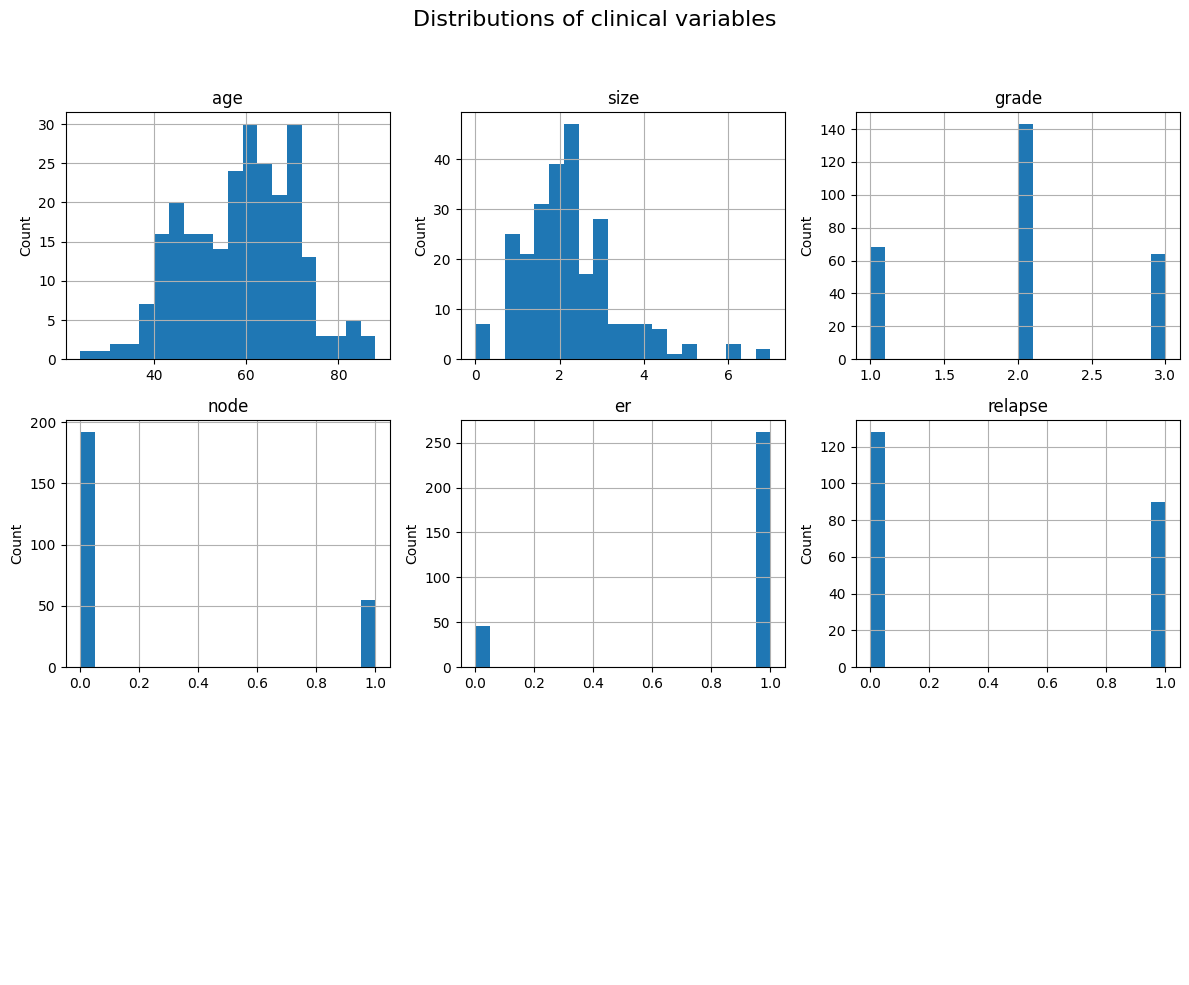

In [8]:
import matplotlib.pyplot as plt

cols = ["age", "size", "grade", "node", "er", "relapse"]

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    df_pat[col].dropna().hist(bins=20, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")

for ax in axes[len(cols):]:
    ax.axis("off")

plt.suptitle("Distributions of clinical variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [9]:
#calculates relevant charackteristics of the patient population

def mean_sd(series):
    s = series.dropna()
    return f"{s.mean():.2f} ± {s.std():.2f}"

def median_iqr(series):
    s = series.dropna()
    q1, q3 = s.quantile([0.25, 0.75])
    return f"{s.median():.2f} ({q1:.2f}–{q3:.2f})"

def missing_stats(series):
    return {
        "n": int(series.isna().sum()),
        "%": round(100 * series.isna().mean(), 1)
    }

def categorical_block(df, column, label_map=None):
    out = []
    counts = df[column].value_counts(dropna=True)
    total = len(df)

    for val, n in counts.items():
        label = label_map.get(val, val) if label_map else val
        out.append({
            "characteristic": column,
            "value": label,
            "n": int(n),
            "%": round(100 * n / total, 1)
        })

    miss = missing_stats(df[column])
    if miss["n"] > 0:
        out.append({
            "characteristic": column,
            "value": "Missing",
            "n": miss["n"],
            "%": miss["%"]
        })

    return out

rows = []


rows.append({
    "characteristic": "Total patients",
    "value": "",
    "n": df_pat.shape[0],
    "%": 100.0
})


rows.append({
    "characteristic": "Age",
    "value": "Mean ± SD",
    "n": mean_sd(df_pat["age"]),
    "%": ""
})
rows.append({
    "characteristic": "Age",
    "value": "Median (IQR)",
    "n": median_iqr(df_pat["age"]),
    "%": ""
})
rows.append({
    "characteristic": "Age",
    "value": "Missing",
    **missing_stats(df_pat["age"])
})


rows.append({
    "characteristic": "Tumor size",
    "value": "Mean ± SD",
    "n": mean_sd(df_pat["size"]),
    "%": ""
})
rows.append({
    "characteristic": "Tumor size",
    "value": "Median (IQR)",
    "n": median_iqr(df_pat["size"]),
    "%": ""
})
rows.append({
    "characteristic": "Tumor size",
    "value": "Missing",
    **missing_stats(df_pat["size"])
})


label_maps = {
    "node": {0.0: "Node negative", 1.0: "Node positive"},
    "er": {0.0: "ER negative", 1.0: "ER positive"},
    "relapse": {0.0: "No relapse", 1.0: "Relapse"}
}

rows += categorical_block(df_pat, "node", label_maps["node"])
rows += categorical_block(df_pat, "grade")
rows += categorical_block(df_pat, "er", label_maps["er"])
rows += categorical_block(df_pat, "relapse", label_maps["relapse"])


In [10]:
table1 = pd.DataFrame(rows)
table1

,characteristic,value,n,%
0,Total patients,,327,100.0
1,Age,Mean ± SD,58.67 ± 11.90,
2,Age,Median (IQR),60.00 (49.00–68.00),
3,Age,Missing,75,22.9
4,Tumor size,Mean ± SD,2.22 ± 1.13,
5,Tumor size,Median (IQR),2.10 (1.50–2.80),
6,Tumor size,Missing,76,23.2
7,node,Node negative,192,58.7
8,node,Node positive,55,16.8
9,node,Missing,80,24.5


In [11]:
#table1.to_excel("table1.xlsx", index=False)

The table offers a conprehensive overview of the df_pat, which inherits the patient information. These Information are commonly displayed as they give valuable insight into the patients participating in the presented study. Likewise these information offer insight to this synthetic datset, including the ammount of missing values. 

In [12]:
#percentage of missing values
missing = df_pat.isna().mean() * 100
missing.round(1)

patient_id     0.0
node          24.5
grade         15.9
size          23.2
age           22.9
er             5.8
relapse       33.3
dtype: float64

In [13]:
missing_per_patient = df_pat.isna().sum(axis=1)
missing_per_patient.value_counts().sort_index()

0    173
1     67
2     12
3      2
4     61
5      2
6     10
Name: count, dtype: int64

Procent of missing values for the pat dataset in the upper depiction. While about 20ish percent are commonly missing for a single value, 10 patients are missing 6 out of 7 columns, which means they only come with a patient ID, 2 patients are missing 5 columns. 

Due to the missing "background information" for the 10 patients, missing all the basic data, it might be suitable to exclude them from the dataset, since there is no information beyond the gene-expression. 

As seen above, there are no missing values in the df_gex. 

In [14]:
df_gex.head()

,patient_id,DDR1,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,EPHB3,ESRRA,CYP2A6,MMP14,TRADD,FNTB,PLD1,PMS2L11,BAD,RPL35,RPL28,EIF4G2,SRP14,GDI2,RPL11,ARF3,RPL24,RPS13,Unnamed: 25,TARDBP,CFL1,RPL18,RPS5,RPL27,RPL34,NARS,RPL19,RPS11,RPL9,DDX5,RPL6,RPL10A,RPL17,PSMB2,BAT1,ERH,SFRS9,ABCF1,DAD1,YY1,JTB,ZNF146,SART1,ILF2,SPAG7,ZNF259,C1D,NONO,RNPS1,RPS24,RPL30,NPM1,ARF1,IK,SNX3,CANX,GUK1,OAZ1,RPS6,USP22,TCEB2,RPL12,RPL4,FNTA,RPS25,RPL37,EEF2,RPS10,ANAPC5,RPS3A,MSN,ACTN4,APP,PRKAR1A,DSP,RAD21,WDR1,NCL,AP2B1,AP2M1,CLTC,LASP1,SF3B2,CSRP1,MATR3,WARS,SET,NDRG1,PFN1,PTPRF,YWHAZ,SOD1,...,PLA2G2E,TAS2R4,MYO3A,CACNG5,OR1F1,INSL6,LOC51190,PCDHB12,OR2S2,HOXD12,KCNAB3,FGF21,RBBP9,MC3R,TAS2R16,OR1A2,ADAM30,TEX15,PCDHB13,BOK,TAS2R3,BTNL2,HTR1F,OR2C1,OR1D2,P2RY4,MC4R,GPR32,RPL15,BNIP3L,B4GALT5,TOB2,STX16,KPNA3,DENR,PLXNA1,EIF4EBP1,ILKAP,SOAT1,SIRT3,SLC26A6,NUDT3,CACNG4,E2F5,PEX16,PIPOX,RPH3AL,MTCH1,WDR4,ZNF83,PPAN,USP3,ACAD8,LHX3,CORO1C,DONSON,DSPP,MAP3K2,UBA52,COL5A2,KIAA1219,GNA12,ADSS,RPE,BRD7,NEFL,KIAA1598,PTPRE,KIAA1609,SYT13,KIAA1324,SYN1,GUCY1A3,EMX2,NXPH4,NXPH3,GNG3,COL9A1,HNT,HPCAL4,GSTA3,ATF1,GTF2H3,PRND,WDR13,KIAA1466,NAALAD2,ADAMTS1,B4GALT7,BIN3,CASP8AP2,POLM,KLK5,SH3BP4,SPO11,TRDN,DKFZP564C196,YDD19,TAZ,GMEB2
0,0,9.2048,6.3038,7.7602,7.9725,4.2653,2.9992,3.6423,6.9242,6.9467,6.3267,6.9030,6.0923,6.0994,5.9858,7.2492,6.4899,11.447,11.879,10.507,10.4020,10.2000,11.163,9.3248,11.618,11.526,11.323,8.4340,11.825,11.706,11.362,11.637,11.712,9.9411,11.678,11.829,11.566,10.1600,11.381,11.3230,11.736,8.7106,9.5844,10.0580,8.7036,7.8632,9.1095,9.5870,11.186,7.7302,6.5761,9.5370,8.1733,6.3151,6.8480,9.9949,9.1046,11.666,11.735,11.157,10.949,7.6840,10.3530,10.6460,9.4257,10.802,12.279,9.1818,9.5564,12.157,11.797,9.3334,10.4180,11.839,11.193,12.382,8.1657,12.256,7.9446,9.1039,9.4204,9.1700,10.5960,8.1796,8.8064,10.4320,8.3101,8.6886,10.386,9.3437,7.8563,9.5866,9.8844,7.1871,9.2925,7.7452,10.0530,9.2372,9.9440,10.149,...,3.9897,4.4809,0.95217,1.8441,5.5427,1.078600,5.1089,2.0911,5.6632,-0.279710,4.7102,2.8822,4.9733,3.5182,4.7198,1.95770,4.3714,4.7594,0.85359,0.62041,0.443670,2.02000,4.6938,5.2143,5.7582,4.9597,4.3259,4.4952,11.889,7.9691,8.3271,5.6431,6.9531,7.4762,8.4270,5.6624,6.0809,6.7650,5.2492,7.5933,5.6248,7.5498,8.0090,4.6052,7.8572,5.2618,6.9879,9.8107,3.2412,5.0589,6.4353,7.7846,6.4437,5.9752,7.9087,5.4757,2.5669,5.2198,11.106,7.9777,7.3605,6.2240,8.6579,6.3299,6.2716,4.4242,7.5320,6.8046,2.4584,5.6685,8.6319,4.8596,8.0201,1.12120,5.5223,6.6990,5.9042,2.40000,4.0403,1.8006,2.09780,6.4113,6.3834,4.4582,7.3590,0.59981,-0.064833,4.6976,5.5736,6.5109,5.8878,2.5847,6.1013,8.4443,3.1510,1.83220,3.38240,3.7738,5.6098,7.2277
1,1,10.0090,5.8149,6.7343,7.9232,3.5011,5.2618,4.3622,6.9789,6.5636,10.4700,7.2736,6.8388,6.0294,5.2169,7.7186,6.6276,11.058,11.435,10.324,10.4700,9.7168,10.868,9.3672,11.156,11.150,11.044,8.3140,11.567,11.600,10.749,11.297,11.203,9.9697,11.129,11.566,11.510,10.4020,10.445,10.6350,11.743,8.6642,10.5570,9.8912,7.9488,7.4126,9.3318,8.7656,10.306,8.2060,6.5640,8.1072,8.0217,6.2639,6.0532,9.9029,8.7957,11.756,11.545,10.689,10.276,7.4565,9.9763,10.9220,8.4436,10.712,11.846,9.0380,8.9267,12.090,11.251,8.6577,10.0150,11.063,11.151,12.072,8.2340,11.830,8.5199,8.6687,10.0960,8.8692,9.8311,8.2769,8.4433,9.5739,9.0706,8.8241,10.320,9.0916,7.7562,9.2035,10.0410,7.3144,9.3167,9.2251,9.6783,9.3706,9.6187,10.556,...,3.2099,4.5543,0.25007,2.1087,4.8583,0.215090,4.3796,2.4801,5.2351,-0.245110,4.9129,3.9570,1.6225,3.4824,4.4691,0.77808,3.7774,4.1345,0.62146,1.10030,0.393120,1.94200,4.7545,5.1639,5.3982,5.5156,4.7112,3.7752,10.737,7.0109,6.8194,5.4861,8.5678,6.5117,7.5433,5.4546,7.3582,6.2465,5.5477,7.7618,5.8222,6.9857,7.9029,5.0704,7.3827,4.6229,6.0619,9.9252,4.6322,6.2461,5.6454,7.4946,6.8086,5.3106,6.6064,5.0082,2.9948,6.0430,10.646,8.5678,7.5852,6.2691,7.1242,6.2826,7.4672,4.3812,7.8380,8.0440,4.9816,5.5457,9.0602,5.0288,9.4775,-0.10266,5.3756,7.0859,6.2019,1.75720,2.1490,2.5101,1.25950,5.8885,3.8752,4.2354,6.8823,4.85190,0.967380,5.9225,6.3153,6.

As the scaling of the single expressions is not known and it is not suitable to search it for all 6400 genes, the representation of the e.g. 15 highest and lowest ranking values is of no good use. 

In [ ]:
gex = df_gex.drop(columns="patient_id")

gene_means = gex.mean()
gene_stds = gex.std()

In [ ]:
#calculate metrics for gen expression
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(gene_means, bins=50)
axes[0].set_title("Distribution of gene-wise means")
axes[0].set_xlabel("Mean expression")

axes[1].hist(gene_stds, bins=50)
axes[1].set_title("Distribution of gene-wise standard deviations")
axes[1].set_xlabel("Standard deviation")

plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
#create layout to use in report
import matplotlib.pyplot as plt
import string

clinical_cols = ["age", "size", "grade", "node", "er", "relapse"]

xlabels = {
    "age": "Age (years)",
    "size": "Tumor size (mm)",
    "grade": "Histological grade",
    "node": "Nodal status",
    "er": "ER status",
    "relapse": "Relapse status",
}

panel_labels = list(string.ascii_uppercase[:8])  # A–H

fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(clinical_cols):
    ax = axes[i]
    df_pat[col].dropna().hist(bins=20, ax=ax)
    ax.set_title(col)
    ax.set_ylabel("Count")
    ax.set_xlabel(xlabels.get(col, col))  # <- Nutzung hier

    ax.text(
        0.0, 1.08, panel_labels[i],
        transform=ax.transAxes,
        fontsize=13,
        fontweight="bold",
        va="bottom",
        ha="left",
        clip_on=False
    )

ax = axes[6]
ax.hist(gene_means, bins=50)
ax.set_title("Gene-wise mean expression")
ax.set_xlabel("Mean expression")
ax.grid(True)
ax.text(
    0.0, 1.08, panel_labels[6],
    transform=ax.transAxes,
    fontsize=13,
    fontweight="bold",
    va="bottom",
    ha="left",
    clip_on=False
)

ax = axes[7]
ax.hist(gene_stds, bins=50)
ax.set_title("Gene-wise standard deviation")
ax.set_xlabel("Standard deviation")
ax.grid(True)
ax.text(
    0.0, 1.08, panel_labels[7],
    transform=ax.transAxes,
    fontsize=13,
    fontweight="bold",
    va="bottom",
    ha="left",
    clip_on=False
)

axes[8].axis("off")

plt.suptitle(
    "Distributions of clinical variables and gene expression statistics",
    fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig(
    PROJECT_ROOT / "results" / "figure_distributions.jpeg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


Left: The mean expression show a quite close distribution beween aprox. -1 and 13, with a median of 5.84. Leading to the interpretation, that the genes are distributed quite close and there are no visible outliers.
Right: Shows the distribution of the standard deviation (sd). The sd is distributed heterogeniously, with a mean sd of about 0.8.

In [ ]:
gex = df_gex.drop(columns="patient_id")

summary_table = pd.DataFrame({
    "mean_expression": gex.mean(),
    "sd_expression": gex.std()
})

summary_table.describe().round(2)


"scaling, variance or MAD filtering" - the data will be used in the current form. 

Scaling might be usefull, but as the expression levels are meanwise roughtly within 0 to 10, it it not that big of a reach that it seems usefull to scale the values. Furthermore the values use the same scale/ same unit of measure (no units given) - meaning there is no need to compare two vales with different scales. 

As to Variance filtering - visibly many genes (the majority) show a deviation of <1.0 SD, interpreded as no huge SD, leads to no need for filtering. Naturally we will select genes in PCA, but as it is not known which genes are relevant or inparticular interesting, ne filter is applied. 

Median absolute deviation (MAD) filtering, is not applied as there are no visible outliers. Since the data will be processed within PCA, it can be assumed that PCA (or other dimensionality reduction techniques) will provide enought robustness to handle the current data-distribution properly. 

In [ ]:
pip freeze